## Importing libraries

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
import joblib
%matplotlib inline

In [32]:
# To ignore the warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [33]:
data.shape

(768, 9)

In [34]:
# informatiom about the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Wrangling

In [35]:
# Creating Nutritional Status column
N_Status = pd.Series([],dtype=pd.StringDtype())

In [36]:
# Nutritional status based on BMI(Body Mass Index)
for i in range(len(data)):
    if data['BMI'][i]==0.0:
        N_Status[i] = None
    elif data['BMI'][i]<18.5: 
        N_Status[i] ="Underweight"
        
    elif data['BMI'][i]<25: 
        N_Status[i] = "Normal"
  
    elif data['BMI'][i]>=25 and data['BMI'][i]<30: 
        N_Status[i] = "Overweight"
  
    elif data['BMI'][i]>=30: 
        N_Status[i] = "Obese"
        
    else: 
        N_Status[i] = pima['BMI'][i]  

In [37]:
# Inserting the column in the original dataset
data.insert(6, "Nutritional Status", N_Status)

In [38]:
# Creating Interpretation of Glucose level column
Glucose_Interpretation = pd.Series([],dtype=pd.StringDtype())

In [39]:
# Interpretation of Glucose
for i in range(len(data)):
    if data['Glucose'][i]==0.0:
        Glucose_Interpretation[i] = None
    elif data['Glucose'][i]<=140:
        Glucose_Interpretation[i] = "Normal"
    elif data['Glucose'][i]>140 and data['Glucose'][i]<=198:
        Glucose_Interpretation[i] = "Impaired Glucose Tolerance"
    elif data['Glucose'][i]>198:
        Glucose_Interpretation[i] = "Diabetic Level"
    else:
        Glucose_Interpretation[i] = data['Glucose'][i]

In [40]:
# Inserting the Glucose_Interpretation column
data.insert(2, "Glucose Result", Glucose_Interpretation)

In [42]:
# Changing all the No Data values to NULL values
for i in range(len(data)):
    if(data["BloodPressure"][i]==0):
        data["BloodPressure"][i]=None
    if(data["SkinThickness"][i]==0):
        data["SkinThickness"][i]=None
    if(data["BMI"][i]==0):
        data["BMI"][i]=None
    

In [43]:
# Checking number of null values in the dataset
data.isnull().sum()

Pregnancies                   0
Glucose                       0
Glucose Result                5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
Nutritional Status           11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

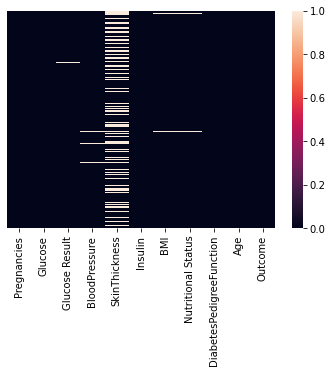

In [44]:
sns.heatmap(data.isnull(),yticklabels=False)

In [45]:
# Dropping the SkinThickness columns as there are many null values
data.drop("SkinThickness",axis=1,inplace=True)

In [47]:
# Dropping all the null values
data.dropna(inplace=True)

In [48]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
Glucose Result              0
BloodPressure               0
Insulin                     0
BMI                         0
Nutritional Status          0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

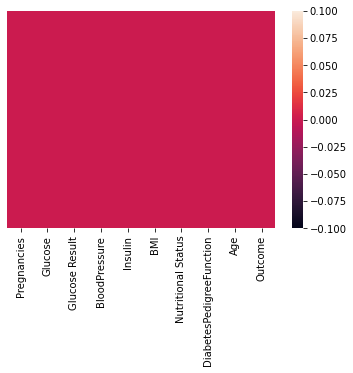

In [49]:
sns.heatmap(data.isnull(),yticklabels=False)

In [51]:
# Dataset after data wrangling
data.head(10)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72.0,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66.0,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64.0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66.0,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40.0,168,43.1,Obese,2.288,33,1
5,5,116,Normal,74.0,0,25.6,Overweight,0.201,30,0
6,3,78,Normal,50.0,88,31.0,Obese,0.248,26,1
8,2,197,Impaired Glucose Tolerance,70.0,543,30.5,Obese,0.158,53,1
10,4,110,Normal,92.0,0,37.6,Obese,0.191,30,0
11,10,168,Impaired Glucose Tolerance,74.0,0,38.0,Obese,0.537,34,1


## Analyzing Data

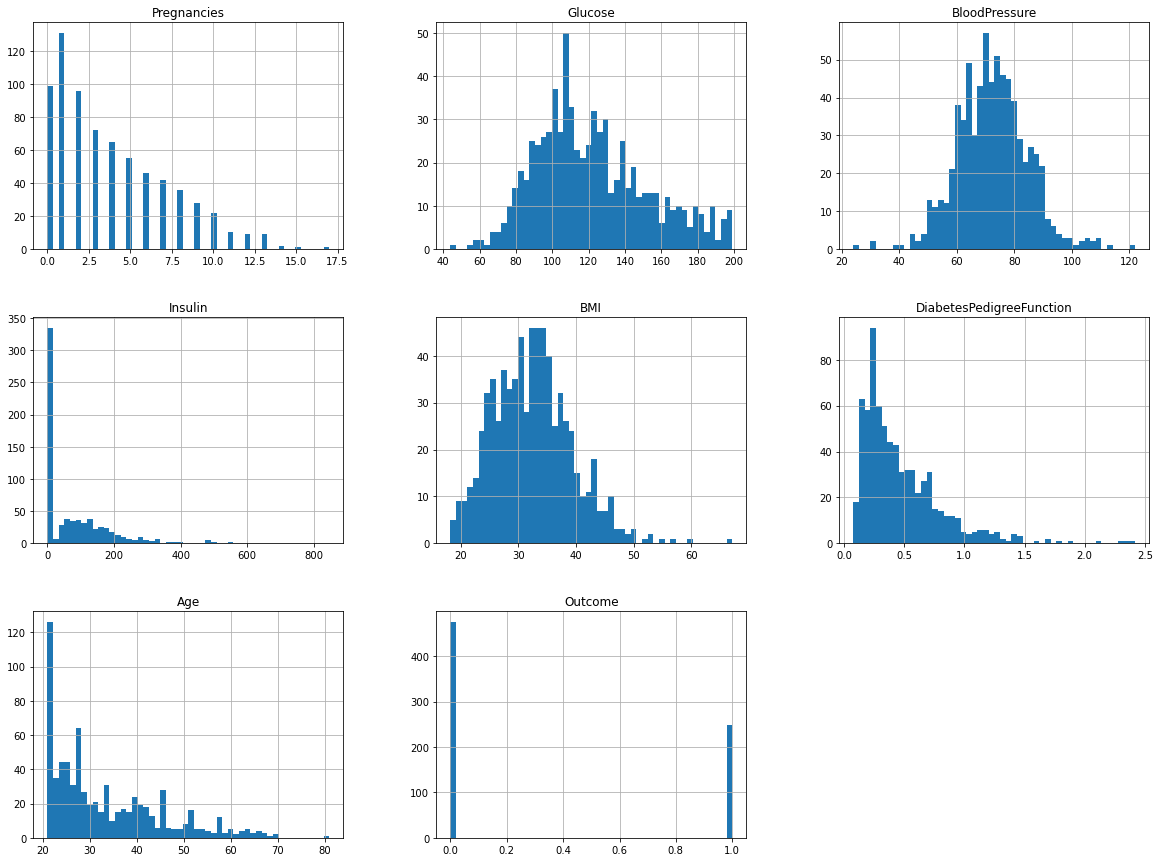

In [58]:
# Histogram
data.hist(bins=50,figsize=(20,15))
plt.show()

In [52]:
# Nutritional Status of the womens in the dataset
data["Nutritional Status"].value_counts()

Obese          453
Overweight     171
Normal          96
Underweight      4
Name: Nutritional Status, dtype: int64

<AxesSubplot:xlabel='Nutritional Status', ylabel='count'>

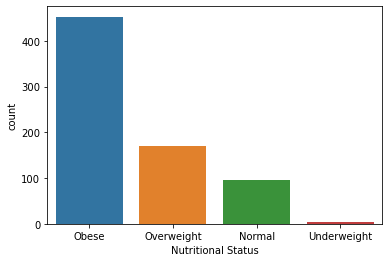

In [53]:
sns.countplot(x="Nutritional Status",data=data)

<AxesSubplot:xlabel='Nutritional Status', ylabel='Age'>

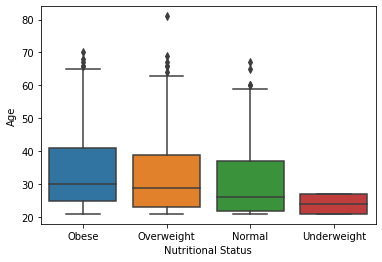

In [54]:
# Graph of Nutritional Status based on Age
sns.boxplot(x="Nutritional Status",y="Age",data=data)

<AxesSubplot:xlabel='Glucose Result', ylabel='Age'>

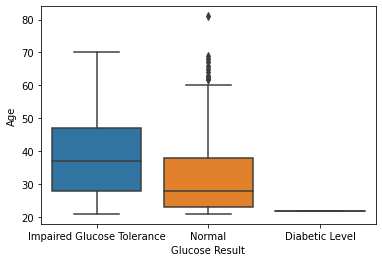

In [59]:
# Glucose Result based on age
sns.boxplot(x="Glucose Result",y="Age",data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

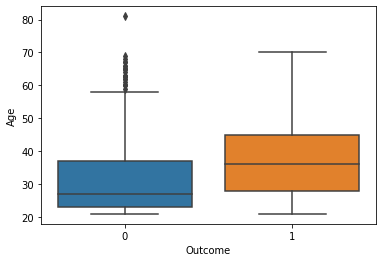

In [60]:
# Diabetes graph based on Age
sns.boxplot(x="Outcome",y="Age",data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

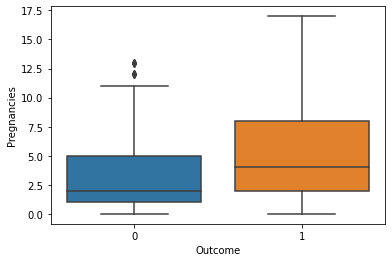

In [66]:
# Diabetes graph based on Pregnancies
sns.boxplot(x="Outcome",y="Pregnancies",data=data)

## Training and Testing

In [70]:
# Dropping the Nutritional Status and Glucose Result
data.drop(["Glucose Result","Nutritional Status"],axis=1,inplace=True)

In [74]:
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=20)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [145]:
# Calculating the accuracy of the model
score = accuracy_score(y_test,predictions)
score

0.7844036697247706

In [153]:
# Saving the KNN Model
joblib.dump(model,"Pina_Diabetes.joblib")

['Pina_Diabetes.joblib']